In [1]:
#@author: nadabeili

import matplotlib.pyplot as plt
import pandas as pd


In [2]:

#importing the dataset
df = pd.read_csv (r'../Data/Cleaned_data_with-tags.csv',encoding = 'unicode_escape')
######targeting Age group

age_list = df['AD_TARGETING_AGE'].tolist()
###### teenager for 13 to 17 
###Young Adult from 18 to 35
###adult from 35 to 44
### middle Age and senior from 45 to 65+

teen = [] 
youngAdult = []
adult = []
middleAge=[] 

i=0
while i < len(age_list):
    k=age_list[i].replace("+","")
    k= k.split("-")
    if((int(k[0])>= 13 and int(k[0]) <=17)or(int(k[1])>= 13 and int(k[1]) <=17)):
        teen.insert(i,1)
    else:teen.insert(i,0)
    if((int(k[0])>= 18 and int(k[0]) <=35)or(int(k[1])>= 35 )):
        youngAdult.insert(i,1)
    else:youngAdult.insert(i,0)
    if((int(k[0])>= 36 and int(k[0]) <=44)or(int(k[1])>= 44 )):
        adult.insert(i,1)
    else:adult.insert(i,0)
    if((int(k[0])>= 45 and int(k[0]) <=65)or(int(k[1])>= 45 and int(k[1]) <=65)):
        middleAge.insert(i,1)
    else:middleAge.insert(i,0)
    i+=1

##### Add different Age groups to the data frame
df["Teen"]=teen
df["Young Adult"]=youngAdult
df["Adult"]=adult
df["Middle Age"]=middleAge
##### delete the rows with ctr=0 and get only Id,ctr ,flag, age groups
df = df[df.CTR != 0]
df= df[['AD_ID','CTR','flag','AD_TARGETING_AGE','Teen','Young Adult','Adult','Middle Age']]
print(df)


      AD_ID     CTR      flag AD_TARGETING_AGE  Teen  Young Adult  Adult  \
0       564   4.883  positive         14 - 65+     1            1      1   
1       565   5.002  positive         14 - 65+     1            1      1   
2       566   4.442   neutral         14 - 65+     1            1      1   
3       567   3.980   neutral         14 - 65+     1            1      1   
5       575  16.955  negative         18 - 65+     0            1      1   
6       580  84.426   neutral         18 - 65+     0            1      1   
7       581   2.503   neutral         18 - 65+     0            1      1   
8       582   9.126   neutral         18 - 65+     0            1      1   
9       583   4.361   neutral         18 - 65+     0            1      1   
10      584  10.140   neutral         18 - 65+     0            1      1   
11      585  10.559   neutral         18 - 65+     0            1      1   
12      586   3.258   neutral         18 - 65+     0            1      1   
13      587 

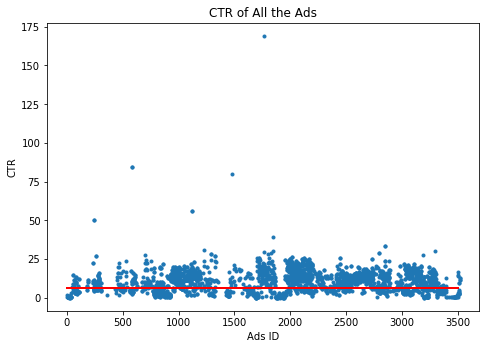

In [3]:
################################################
### analyse the ctr of all the Ads
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(df['AD_ID'],df['CTR'],'.')
ax.plot([0,3500],[6.15,6.15],'r-',lw=2)
ax.set_xlabel('Ads ID')
ax.set_ylabel('CTR')
ax.set_title('CTR of All the Ads');



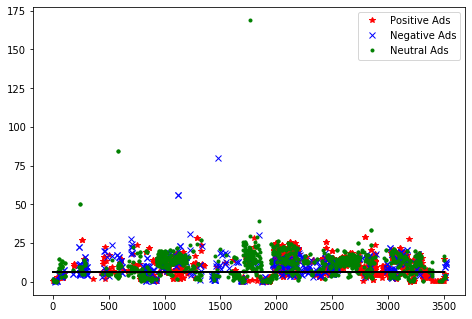

In [4]:
####
# try to analyse CTR of positive/ Negative/Neutral ADS
dataPositive= df.loc[df['flag']== 'positive']
dataNegative= df.loc[df['flag']== 'negative']
dataNeutral= df.loc[df['flag']== 'neutral']

###Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(dataPositive['AD_ID'],dataPositive['CTR'],'*r', label="Positive Ads")
ax.plot(dataNegative['AD_ID'],dataNegative['CTR'],'xb', label="Negative Ads")
ax.plot(dataNeutral['AD_ID'],dataNeutral['CTR'],'.g', label="Neutral Ads")
ax.plot([0,3500],[6.15,6.15],'k-',lw=2)
ax.legend()


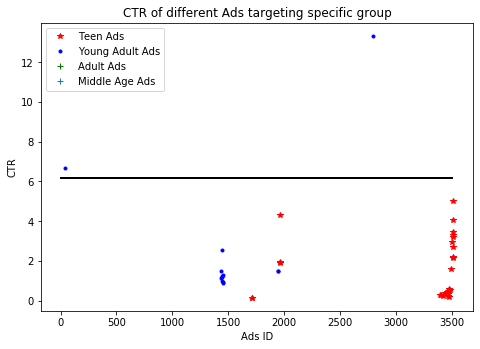

In [5]:
######find Ads targetiing only one group
#########
dataTeen= df.loc[(df['Teen']== 1 )& (df['Young Adult']!= 1 )& (df['Adult'] != 1 )& (df['Middle Age']!= 1)]
dataYoungAdult= df.loc[(df['Teen']!= 1 )& (df['Young Adult']== 1 )& (df['Adult'] != 1 )& (df['Middle Age']!= 1)]
dataAdult= df.loc[(df['Teen']!= 1 )& (df['Young Adult']!= 1 )& (df['Adult'] == 1 )& (df['Middle Age']!= 1)]
dataMiddleAge= df.loc[(df['Teen']!= 1 )& (df['Young Adult']!= 1 )& (df['Adult'] != 1 )& (df['Middle Age']== 1)]
##Plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(dataTeen['AD_ID'],dataTeen['CTR'],'*r', label="Teen Ads")
ax.plot(dataYoungAdult['AD_ID'],dataYoungAdult['CTR'],'.b', label="Young Adult Ads")
ax.plot(dataAdult['AD_ID'],dataAdult['CTR'],'+g', label="Adult Ads")
ax.plot(dataMiddleAge['AD_ID'],dataMiddleAge['CTR'],'+', label="Middle Age Ads")
ax.plot([0,3500],[6.15,6.15],'k-',lw=2)
ax.legend()
ax.set_xlabel('Ads ID')
ax.set_ylabel('CTR')
ax.set_title('CTR of different Ads targeting specific group');



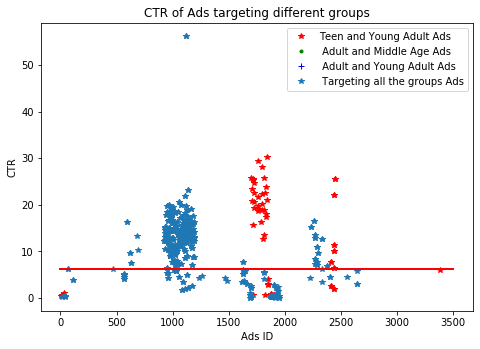

In [6]:
##### targeting two groups
dataTeenY= df.loc[(df['Teen']== 1 )& (df['Young Adult']== 1 )& (df['Adult'] != 1 )& (df['Middle Age']!= 1)]
dataAdultM= df.loc[(df['Teen']!= 1 )& (df['Young Adult']!= 1 )& (df['Adult'] == 1 )& (df['Middle Age']== 1)]
dataAdultY= df.loc[(df['Teen']!= 1 )& (df['Young Adult']== 1 )& (df['Adult'] == 1 )& (df['Middle Age']!= 1)]
dataAll= df.loc[(df['Teen']== 1 )& (df['Young Adult']== 1 )& (df['Adult'] == 1 )& (df['Middle Age']== 1)]

###
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(dataTeenY['AD_ID'],dataTeenY['CTR'],'*r', label="Teen and Young Adult Ads")
ax.plot(dataAdultM['AD_ID'],dataAdultM['CTR'],'.g', label=" Adult and Middle Age Ads")
ax.plot(dataAdultY['AD_ID'],dataAdultY['CTR'],'+b', label=" Adult and Young Adult Ads")
ax.plot(dataAll['AD_ID'],dataAll['CTR'],'*', label=" Targeting all the groups Ads")
ax.plot([0,3500],[6.15,6.15],'r-',lw=2)
ax.legend()
ax.set_xlabel('Ads ID')
ax.set_ylabel('CTR')
ax.set_title('CTR of Ads targeting different groups');


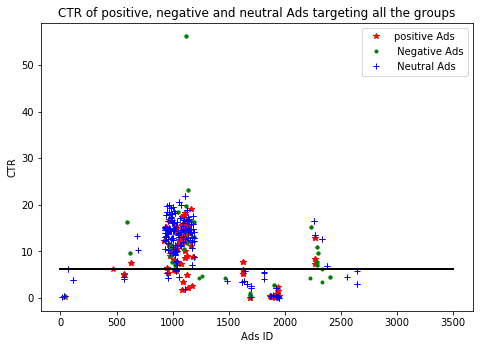

In [7]:

#####positive and negative Ads for the Ads targeting all the groups
dataAllPositive= dataAll.loc[dataAll['flag']== 'positive']
dataAllNegative= dataAll.loc[dataAll['flag']== 'negative']
dataAllNeutral= dataAll.loc[dataAll['flag']== 'neutral']
####plot
###
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(dataAllPositive['AD_ID'],dataAllPositive['CTR'],'*r', label="positive Ads")
ax.plot(dataAllNegative['AD_ID'],dataAllNegative['CTR'],'.g', label=" Negative Ads")
ax.plot(dataAllNeutral['AD_ID'],dataAllNeutral['CTR'],'+b', label=" Neutral Ads")
ax.plot([0,3500],[6.15,6.15],'k-',lw=2)

ax.legend()
ax.set_xlabel('Ads ID')
ax.set_ylabel('CTR')
ax.set_title('CTR of positive, negative and neutral Ads targeting all the groups');






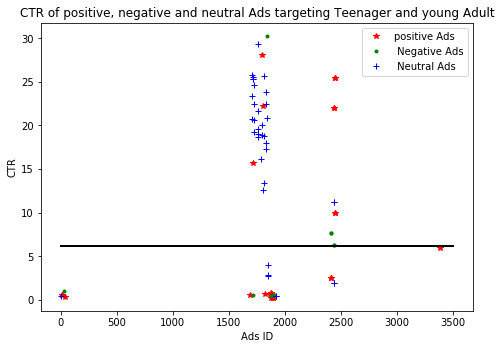

In [8]:
######################
##Ads targeting teen and young Adult
dataTeenYPositive= dataTeenY.loc[dataTeenY['flag']== 'positive']
dataTeenYNegative= dataTeenY.loc[dataTeenY['flag']== 'negative']
dataTeenYNeutral= dataTeenY.loc[dataTeenY['flag']== 'neutral']
#########plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(dataTeenYPositive['AD_ID'],dataTeenYPositive['CTR'],'*r', label="positive Ads")
ax.plot(dataTeenYNegative['AD_ID'],dataTeenYNegative['CTR'],'.g', label=" Negative Ads")
ax.plot(dataTeenYNeutral['AD_ID'],dataTeenYNeutral['CTR'],'+b', label=" Neutral Ads")
ax.plot([0,3500],[6.15,6.15],'k-',lw=2)
ax.legend()
ax.set_xlabel('Ads ID')
ax.set_ylabel('CTR')
ax.set_title('CTR of positive, negative and neutral Ads targeting Teenager and young Adult');
######################
